In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [4]:
from sqlalchemy import inspect

from datetime import datetime

# Import the sqlalchemy extract function.
from sqlalchemy import extract


In [5]:
inspector = inspect(engine)
inspector.get_table_names() 

['measurement', 'station']

In [6]:
column_names = inspector.get_columns('station')
for column_name in column_names:
    print(column_name["name"])

id
station
name
latitude
longitude
elevation


In [7]:
column_names = inspector.get_columns('measurement')
for column_name in column_names:
    print(column_name["name"])

id
station
date
prcp
tobs


In [8]:
session.query(func.count(Station.station)).all()

[(9,)]

       tobs
0      65.0
1      63.0
2      74.0
3      76.0
4      73.0
...     ...
19545  71.0
19546  78.0
19547  76.0
19548  76.0
19549  76.0

[19550 rows x 1 columns]


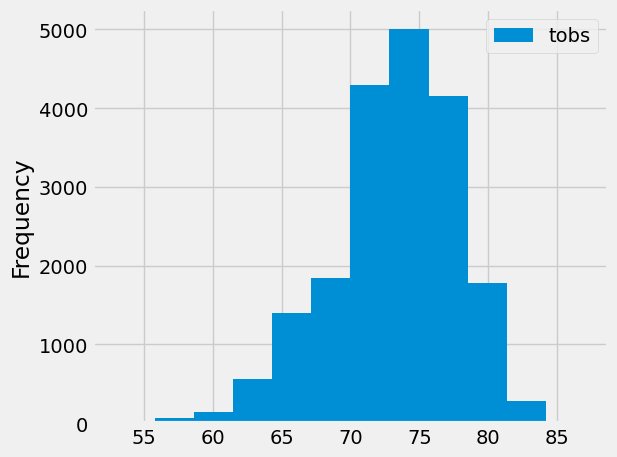

In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

results = session.query(Measurement.tobs).all()
df = pd.DataFrame(results, columns = ['tobs'])

print(df)

df.plot.hist(bins=12)
plt.tight_layout()

In [10]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [11]:
session.query(func.count(Measurement.tobs)).\
    filter(Measurement.date =='2010-01-01').all()

[(7,)]

In [12]:
session.query(func.min(Measurement.date), func.max(Measurement.date)).all()

[('2010-01-01', '2017-08-23')]

In [13]:
june = session.query(Measurement.date,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(extract('month',Measurement.date)==6).\
    group_by(Measurement.date).order_by(func.count(Measurement.date).desc()).all()


In [14]:
df = pd.DataFrame(june, columns = ['date','min','max','ave'])

print(df)



           date   min   max        ave
0    2012-06-29  71.0  79.0  73.888889
1    2012-06-26  69.0  75.0  71.777778
2    2012-06-21  71.0  78.0  74.555556
3    2011-06-21  68.0  76.0  72.555556
4    2011-06-15  73.0  77.0  75.111111
..          ...   ...   ...        ...
235  2015-06-07  72.0  78.0  76.000000
236  2015-06-02  67.0  78.0  72.600000
237  2014-06-28  71.0  79.0  75.800000
238  2016-06-04  65.0  75.0  70.500000
239  2015-06-28  72.0  80.0  76.500000

[240 rows x 4 columns]


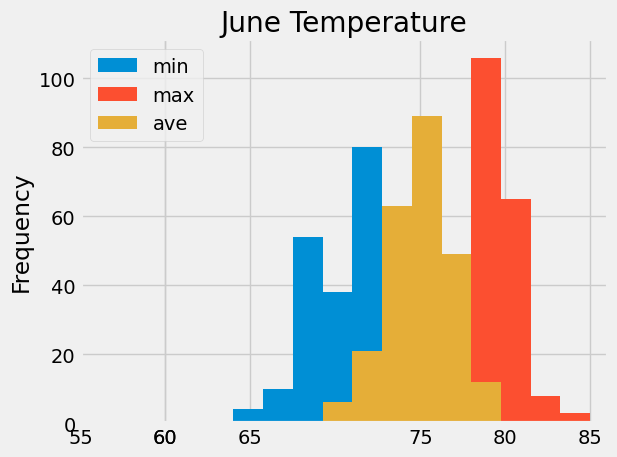

In [15]:

df.plot.hist(bins=12, title = "June Temperature", xticks=(55,60,65,60,75,80,85))

plt.tight_layout()



In [16]:
dec = session.query(Measurement.date,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(extract('month',Measurement.date)==12).\
    group_by(Measurement.date).order_by(func.count(Measurement.date).desc()).all()


In [17]:
df = pd.DataFrame(dec, columns = ['date','min','max','ave'])

print(df)


           date   min   max        ave
0    2013-12-23  64.0  74.0  70.666667
1    2013-12-20  69.0  79.0  72.444444
2    2013-12-19  68.0  72.0  70.222222
3    2013-12-17  63.0  74.0  69.000000
4    2012-12-06  64.0  75.0  70.333333
..          ...   ...   ...        ...
212  2012-12-25  71.0  74.0  72.800000
213  2010-12-25  69.0  74.0  71.400000
214  2015-12-30  70.0  74.0  72.250000
215  2015-12-21  75.0  78.0  75.750000
216  2015-12-06  71.0  75.0  72.750000

[217 rows x 4 columns]


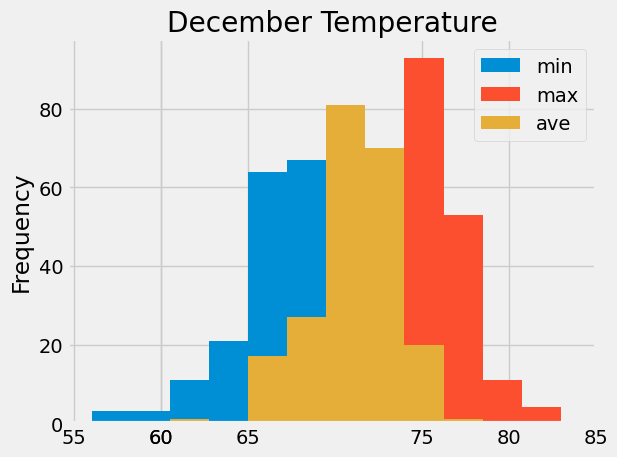

In [18]:

df.plot.hist(bins=12, title = "December Temperature", xticks=(55,60,65,60,75,80,85))

plt.tight_layout()

In [20]:
junegood = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==6).\
    filter(Measurement.tobs >= 76 ).filter(Measurement.tobs <= 82).\
    group_by(Measurement.date).order_by(func.count(Measurement.date).desc()).all()


In [21]:
df = pd.DataFrame(junegood, columns = ['date','temp'])

print(df)

           date  temp
0    2017-06-29  79.0
1    2017-06-26  81.0
2    2017-06-19  80.0
3    2017-06-15  78.0
4    2017-06-04  79.0
..          ...   ...
224  2011-06-24  77.0
225  2011-06-21  76.0
226  2011-06-07  77.0
227  2010-06-18  77.0
228  2010-06-04  76.0

[229 rows x 2 columns]


In [22]:
june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==6).\
    group_by(Measurement.date).order_by(func.count(Measurement.date).desc()).all()
df = pd.DataFrame(june, columns = ['date','temp'])

print(df)

           date  temp
0    2012-06-29  76.0
1    2012-06-26  73.0
2    2012-06-21  76.0
3    2011-06-21  76.0
4    2011-06-15  77.0
..          ...   ...
235  2015-06-07  78.0
236  2015-06-02  78.0
237  2014-06-28  79.0
238  2016-06-04  74.0
239  2015-06-28  76.0

[240 rows x 2 columns]


In [23]:
decgood = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==12).\
    filter(Measurement.tobs >= 76 ).filter(Measurement.tobs <= 82).\
    group_by(Measurement.date).order_by(func.count(Measurement.date).desc()).all()

df = pd.DataFrame(decgood, columns = ['date','temp'])

print(df)

           date  temp
0    2012-12-03  76.0
1    2016-12-20  77.0
2    2015-12-19  76.0
3    2014-12-20  78.0
4    2010-12-27  76.0
..          ...   ...
100  2010-12-14  78.0
101  2010-12-13  80.0
102  2010-12-07  76.0
103  2010-12-06  78.0
104  2010-12-05  78.0

[105 rows x 2 columns]
